# Classification

### Data Exploration

Load data

In [1]:
import pandas as pd

# Load JSON data file
df = pd.read_json("data/electronics_reviews.json", lines=True)
df.shape

(226725, 10)

Preview Data

In [2]:
df.head()

,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase
0,5,Wow,This is awesome!!! Staying in RV for 2 months ...,[],B07YNLBS7R,B08F9ZCTCL,AHX4XWVVQUKT3FCNWCVASDF4Q56Q,2023-01-13 13:23:49.196,0,True
1,5,micro memory card for samsung phones,This memory card is a must have if you have a ...,[],B08KSG2JMV,B08KSG2JMV,AFZUK3MTBIBEDQOPAK3OATUOUKLA,2023-01-13 23:52:49.320,2,True
2,5,Echo dot 3rd gen,I use my Echo dot (3rd gen 2018 release) in my...,[],B07FZ8S74R,B07H65KP63,AFZUK3MTBIBEDQOPAK3OATUOUKLA,2023-01-09 18:29:43.584,33,True
3,4,"Echo dot holder, bird nest",I had a really cute black owl for my old echo ...,[],B08TBDBQ1C,B08TBDBQ1C,AFZUK3MTBIBEDQOPAK3OATUOUKLA,2023-01-09 17:56:48.981,0,True
4,5,Emergency radio with handcrank and solar charging,I purchased this for our survival kit - it's g...,[],B085ZX6TCR,B0BC87S9SY,AFZUK3MTBIBEDQOPAK3OATUOUKLA,2023-01-01 00:38:53.148,20,True


Statistical Summary

In [3]:
df.info()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226725 entries, 0 to 226724
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   rating             226725 non-null  int64         
 1   title              226725 non-null  object        
 2   text               226725 non-null  object        
 3   images             226725 non-null  object        
 4   asin               226725 non-null  object        
 5   parent_asin        226725 non-null  object        
 6   user_id            226725 non-null  object        
 7   timestamp          226725 non-null  datetime64[ns]
 8   helpful_vote       226725 non-null  int64         
 9   verified_purchase  226725 non-null  bool          
dtypes: bool(1), datetime64[ns](1), int64(2), object(6)
memory usage: 15.8+ MB


,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase
count,226725.000000,226725,226725,226725,226725,226725,226725,226725,226725.000000,226725
unique,NaN,152723,213552,22425,92947,72525,180585,NaN,NaN,2
top,NaN,Great product,,[],B0B9RJ68BV,B0BZ6XH3LC,AGH5ZCKJNRAZ7L7TOHMV35GMF2SQ,NaN,NaN,True
freq,NaN,1437,1038,203937,1090,1090,69,NaN,NaN,198294
mean,4.098719,NaN,NaN,NaN,NaN,NaN,NaN,2023-01-08 04:09:58.443232512,0.546455,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,2023-01-01 00:00:06.616000,0.000000,NaN
25%,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,2023-01-04 19:33:53.262000128,0.000000,NaN
50%,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,2023-01-08 01:54:55.747000064,0.000000,NaN
75%,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,2023-01-11 16:17:37.343000064,0.000000,NaN
max,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,2023-01-14 23:59:52.597000,877.000000,NaN


Missing values analysis

In [4]:
df.isnull().sum()

rating               0
title                0
text                 0
images               0
asin                 0
parent_asin          0
user_id              0
timestamp            0
helpful_vote         0
verified_purchase    0
dtype: int64

There are no missing values in the crawled data.

Rating Distribution

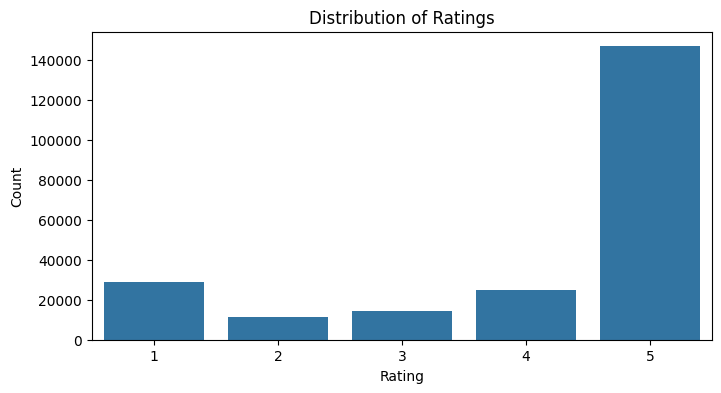

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 4))
sns.countplot(x='rating', data=df)
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()


Sample review by rating

In [13]:
for rating in sorted(df['rating'].unique()):
    print(f"\n #----- Rating: {rating} -----#")
    print(df[df['rating'] == rating]['text'].sample(1).values[0])



 #----- Rating: 1 -----#
Can’t get it to show videos on screen.

 #----- Rating: 2 -----#
Some of them work and some of them don’t .  Then the ones that do work don’t last long

 #----- Rating: 3 -----#
This thing makes a loud clicking noise every 5 seconds at idle. It sounds like its failing but I haven't noticed any performance issues yet.

 #----- Rating: 4 -----#
So this whole thing is pretty interesting it doesn't pick you up as well as it should at least with the bit I've used it it's not very user friendly as I thought it should be and I'm not that offten using cameras and cameras and technology for that posting and stuff like that but that's why it should be the easiest quick you know playing like it showed in the video to track you in all that but I could not get it to go through that very well it kept getting distracted with Surrounding environment and not tracking me. Definitely could use some more time with this To figure out the settings and use it more than what I have s

From the above, we can see the difference in sentiment in ratings ranging from 1 star (negative) to 5 stars (postive).
We can also see that the text in reviews have a combination of uppercase and lowercase, punctuations, and stopwords. We will need to preprocess this.
- Lowercasing letters: standardises words to reduce redundancy.
- Removing Punctuations: doesnt contribute much to sentiment or subjectivity
- Removing stopwords: occurs frequently and usually not informative, removing them ensures focus on important words.
- Tokenization: makes text usable by machine learning models.
- Lemmatization: groups different word forms to its original base form, improving generalisation.

Number of words per review

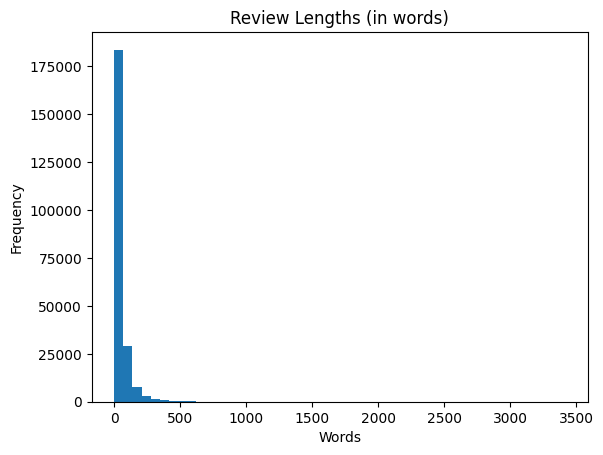

In [14]:
df['text_length'] = df['text'].apply(lambda x: len(x.split()))
df['text_length'].describe()

plt.hist(df['text_length'], bins=50)
plt.title("Review Lengths (in words)")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.show()


### Data Preprocessing

Install NLTK resources

In [18]:
import nltk

nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml
showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

Text cleaning function using NLTK.
- lowercase all letters
- punctuation removal
- stopword removal
- tokenize
- lemmatize

In [19]:
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    # Lowercase
    text = text.lower()
    # Tokenize
    tokens = word_tokenize(text)
    # Remove punctuation & stopwords, then lemmatize
    cleaned = [lemmatizer.lemmatize(word) for word in tokens 
               if word not in stop_words and word not in string.punctuation]
    return " ".join(cleaned)


Clean text

In [20]:
from tqdm import tqdm
tqdm.pandas()

df['clean_text'] = df['text'].progress_apply(clean_text)


100%|██████████| 226725/226725 [00:51<00:00, 4441.49it/s]


In [21]:
df[['text', 'clean_text']].sample(5)

,text,clean_text
88650,Got this for our granddaughter and she was thr...,got granddaughter thrilled tried right away li...
158311,The reviews and product info all referenced us...,review product info referenced using iphone ip...
188253,When I signed-up for Comcast Xfinity a couple ...,signed-up comcast xfinity couple year ago made...
19510,"does exactly what I needed it for, would buy a...",exactly needed would buy use electronics work
84003,Love the motif and how sturdy it is.,love motif sturdy


In [25]:
for rating in sorted(df['rating'].unique()):
    print(f"\n #----- Rating: {rating} -----#")
    print(df[df['rating'] == rating]['clean_text'].sample(1).values[0])


 #----- Rating: 1 -----#
disssapointed. br genesis technology speaker well respected spec system fantastic order mute everything totally kill vibrancy area .... 500 tweeter happy amazing detail crushed make nice lamp cord

 #----- Rating: 2 -----#
bought keyboard april 2022 's starting stop working randomly key register wo n't able type anything would n't recommend board anyone

 #----- Rating: 3 -----#
usb actually drained phone overnight instead charging

 #----- Rating: 4 -----#
bought one came broken display replacement worked first image quality great gently moving screen seemed crack crazy uperfect gave upgraded model metal frame one work great customer support good fast communication quick shipping. br br three star overall br original product bought 1 star br customer support upgraded replacement 5 star br br 3 star overall guess

 #----- Rating: 5 -----#
cable appears well made photo product listing accurate connection end well formed metal housing molded hard plastic strain 

Reviewing some examples after text cleaning, it seems that the original sentiment of the text reviews remain unchanged.

In [26]:
df.to_csv("data/cleaned_reviews.csv", index=False)

### Manual Annotation

Annotations:
- Subjectivity: factual (0) vs opinionated (1)
- Polarity: negative (0) vs positive (1)

--- Leave polarity blank if subjectivity == 0, since its factual, there is no polarity to it.

In [ ]:
# Sample 1,000 random reviews
sample_df = df[['text', 'clean_text','rating']].sample(1000, random_state=42)

sample_df['subjectivity_1'] = ""
sample_df['polarity_1'] = ""
sample_df['subjectivity_2'] = ""
sample_df['polarity_2'] = ""

# Save to CSV for manual annotation (download and rename as annotated.csv)
sample_df.to_csv("to_annotate.csv", index=False)


In [29]:
df = pd.read_csv("annotated.csv")
df.head()

,text,clean_text,rating,subjectivity_1,polarity_1,subjectivity_2,polarity_2
0,I literally wore out my previous mouse. This ...,literally wore previous mouse one comfortable ...,5,1,1.0,1.0,1.0
1,Very easy to set up. The clock/alarm feature i...,easy set clock/alarm feature great,5,1,1.0,1.0,1.0
2,Very nice backdrop. Light weight easy to keep ...,nice backdrop light weight easy keep wall,5,1,1.0,1.0,1.0
3,I was looking for a way to add a little more r...,looking way add little room desk monitor stand...,5,1,1.0,1.0,1.0
4,I paid for the 2 year worry free warrantly. Bo...,paid 2 year worry free warrantly bought sale c...,3,1,0.0,1.0,0.0


During manual annotation, I realised that negation words are removed under "stopwords" in text cleaning. Doing so incorrectly changes the polarity of the text review and will cause inconsistency in the classification.

### Removal of negators from stopwords

In [ ]:
import contractions

stop_words = set(stopwords.words('english'))
negation_words = {
    'no', 'not', 'nor', 'don', "don't", 'didn', "didn't",
    'won', "won't", 'isn', "isn't", 'aren', "aren't",
    'wasn', "wasn't", 'weren', "weren't"
}
stop_words = stop_words - negation_words

lemmatizer = WordNetLemmatizer()

def clean_text(text):
    if pd.isnull(text):
        return ""
    text = contractions.fix(text.lower()) # split don't into do not
    tokens = word_tokenize(text)
    cleaned = [
        lemmatizer.lemmatize(word) for word in tokens
        if word.isalpha() and word not in stop_words
    ]
    return ' '.join(cleaned)
df = pd.read_csv("annotated_cleaned.csv")
df['clean_text'] = df['text'].apply(clean_text)

df.to_csv("annotated_cleaned.csv", index=False)

# START RUNNING FROM HERE 

In [1]:
import pandas as pd
df = pd.read_csv("train_set.csv")
df.head()

,review_timestamp,review_text_original,review_text_cleaned,user_rating,subjectivity_1,polarity_1,subjectivity_2,polarity_2
0,02-01-2023 23:26:27,"bought this to replace my old airpod pro case,...",bought replace old airpod pro case waiting cas...,1,1,0.0,1,0.0
1,06-01-2023 12:17:25,shouldn't be recommended for year olds. looks ...,not recommended year old look baby small…,3,1,0.0,1,0.0
2,07-01-2023 21:44:34,"i didn't want to deal with a case, but just go...",not want deal case got sick dropping earbuds s...,4,1,1.0,1,1.0
3,09-01-2023 21:40:26,the quality at this price point is great. soun...,quality price point great sound excellent,5,1,1.0,1,1.0
4,09-01-2023 19:33:02,works as advertised on my apple i-phone and pad.,work advertised apple i-phone pad,4,1,1.0,1,1.0


In [2]:
from sklearn.metrics import cohen_kappa_score


# Convert labels to integers
df['subjectivity_1'] = df['subjectivity_1'].astype('Int64')
df['subjectivity_2'] = df['subjectivity_2'].astype('Int64')
df['polarity_1'] = df['polarity_1'].astype('Int64')
df['polarity_2'] = df['polarity_2'].astype('Int64')

# Subjectivity Kappa — use all rows
kappa_subjectivity = cohen_kappa_score(df['subjectivity_1'], df['subjectivity_2'])*100

# Polarity Kappa — only where both subjectivity_1 and subjectivity_2 are 1
subjective_rows = df[(df['subjectivity_1'] == 1) & (df['subjectivity_2'] == 1)]
kappa_polarity = cohen_kappa_score(subjective_rows['polarity_1'], subjective_rows['polarity_2'])*100

# Print results
print(f"Subjectivity Agreement (Cohen's Kappa): {kappa_subjectivity:.2f}%")
print(f"Polarity Agreement (Cohen's Kappa, subjective only): {kappa_polarity:.2f}%")


Subjectivity Agreement (Cohen's Kappa): 98.98%
Polarity Agreement (Cohen's Kappa, subjective only): 89.65%


Cohen's Kappa Score measures the percentage of agreement between the two annotators. Subjectivity_1 and Polarity_1 is done by Annotator 1, and Subjectivity_2 and Polarity_2 is done by Annotator 2.

### Subjective Classification

In [4]:
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

# Load and prepare dataset
df_full = pd.read_csv("train_set.csv")
df_subj = df_full[df_full['subjectivity_1'] == df_full['subjectivity_2']].copy()
df_subj['subjectivity'] = df_subj['subjectivity_1']
df_subj = df_subj[df_subj['review_text_cleaned'].notnull() & (df_subj['review_text_cleaned'].str.strip() != "")]

# TF-IDF vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X_subj = vectorizer.fit_transform(df_subj['review_text_cleaned']).toarray()
y_subj = df_subj['subjectivity']

X_train, X_test, y_train, y_test = train_test_split(X_subj, y_subj, test_size=0.2, random_state=42)

# Build model
model_subj = Sequential([
    Dense(512, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.4),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])
model_subj.compile(optimizer=Adam(learning_rate=3e-4), loss='binary_crossentropy', metrics=['accuracy'])

# Train
model_subj.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1, verbose=0)

# Prediction
y_probs = model_subj.predict(X_test).flatten()

# Evaluate multiple thresholds
thresholds = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
best_threshold = 0.5
best_macro_f1 = 0

print("\nEvaluating thresholds:")
from sklearn.metrics import f1_score

for t in thresholds:
    y_pred = (y_probs > t).astype("int32")
    report = classification_report(y_test, y_pred, output_dict=True)
    macro_f1 = report["macro avg"]["f1-score"]
    
    print(f"\nThreshold: {t}")
    print(classification_report(y_test, y_pred))
    
    if macro_f1 > best_macro_f1:
        best_macro_f1 = macro_f1
        best_threshold = t

print(f"\n Best threshold = {best_threshold} with macro F1 = {best_macro_f1:.4f}")

# Random Classifier
y_random = np.random.choice([0, 1], size=len(y_test))
print("\nRandom Classifier (Subjectivity):")
print(classification_report(y_test, y_random))

# Prediction speed test
start = time.time()
_ = model_subj.predict(X_test)
print(f"\nPrediction time: {time.time() - start:.4f} seconds for {len(X_test)} samples")




c:\Users\junhu\classification_qn4\nlu_classification_env\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 

Evaluating thresholds:

Threshold: 0.3
              precision    recall  f1-score   support

           0       0.50      0.22      0.30        37
           1       0.84      0.95      0.89       163

    accuracy                           0.81       200
   macro avg       0.67      0.58      0.60       200
weighted avg       0.78      0.81      0.78       200


Threshold: 0.4
              precision    recall  f1-score   support

           0       0.50      0.22      0.30        37
           1       0.84      0.95      0.89       163

    accuracy                           0.81       200
   macro avg       0.67      0.58      0.60       200
weighted avg       0.78      0.81      0.78       200


Threshold: 0.5
              precision    recall  f1-score   support

           0       0.56      0.27      0.36        37
           1       0.85      0.95      0.90       163

    accuracy                           0.82       200
   macro avg      

- precision: the proportion of correct positive predictions out of all positive predictions. (TP/TP+FP)
- recall: the proportion of correct positive predictions out of all actual positive predictions. (TP/TP+FN)
- F1-score: harmonic mean of precision and recall

Looking at the results from the best threshold of 0.8,
The model performed extremely well on prediction of subjectivity = 1 (opinionated) as seen from the high precision (0.88), recall (0.91), and F1 score (0.90). However, it seems to struggle a bit when predicting subjectivity = 0 (factual), with only a 46% recall. This could be due to the fact that the data distribution is biased towards opinionated as seen from the high percentage of it in the test split compared to factual instances. (37 factual, 163 opinionated)

The random classifier has an overall accuracy of 0.51, which is expected from random choices between 0 and 1.Other than the recall for factial(0) being the same, the rest of the metrics are a lot lower than the model we trained. Comparing to the random classifier, the deep learning model works better in terms of predicting the subjectivity of text reviews.

### Polarity Classification

In [5]:
# For polarity: use only where both agreed it's subjective AND agreed on polarity
df_agreed = df[df['subjectivity_1'] == df['subjectivity_2']].copy()
df_agreed['subjectivity'] = df_agreed['subjectivity_1']

df_agreed = df_agreed[(df_agreed['subjectivity'] == 1) & 
                      (df_agreed['polarity_1'] == df_agreed['polarity_2'])]

df_agreed['polarity'] = df_agreed['polarity_1']


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

df_pol = df_agreed.copy()
df_pol = df_pol[df_pol['review_text_cleaned'].notnull() & (df_pol['review_text_cleaned'].str.strip() != "")]
X_pol = vectorizer.transform(df_pol['review_text_cleaned']).toarray()
y_pol = df_pol['polarity'].astype(int)

X_train, X_test, y_train, y_test = train_test_split(X_pol, y_pol, test_size=0.2, random_state=42)

# Model
model_pol = Sequential([
    Dense(512, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.4),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model_pol.compile(
    optimizer=Adam(learning_rate=3e-4),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Train
model_pol.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1, verbose=0)

# 4. Predict probabilities
y_prob = model_pol.predict(X_test).flatten()

# Find best threshold
thresholds = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
best_threshold = 0.5
best_macro_f1 = 0

print("\nEvaluating thresholds for polarity prediction:")

for t in thresholds:
    y_pred = (y_prob > t).astype("int32")
    report = classification_report(y_test, y_pred, output_dict=True)
    macro_f1 = report["macro avg"]["f1-score"]

    print(f"\nThreshold: {t}")
    print(classification_report(y_test, y_pred))

    if macro_f1 > best_macro_f1:
        best_macro_f1 = macro_f1
        best_threshold = t

print(f"\n Best threshold = {best_threshold} with macro F1 = {best_macro_f1:.4f}")

# Random Classifier
y_random = np.random.choice([0, 1], size=len(y_test))
print("\nRandom Classifier (Polarity):")
print(classification_report(y_test, y_random))

# Prediction speed test
start = time.time()
_ = model_pol.predict(X_test)
print(f"\nPrediction time: {time.time() - start:.4f} seconds for {len(X_test)} samples")


c:\Users\junhu\classification_qn4\nlu_classification_env\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step

Evaluating thresholds for polarity prediction:

Threshold: 0.3
              precision    recall  f1-score   support

           0       0.70      0.62      0.66        65
           1       0.75      0.81      0.78        91

    accuracy                           0.73       156
   macro avg       0.72      0.71      0.72       156
weighted avg       0.73      0.73      0.73       156


Threshold: 0.4
              precision    recall  f1-score   support

           0       0.70      0.65      0.67        65
           1       0.76      0.80      0.78        91

    accuracy                           0.74       156
   macro avg       0.73      0.72      0.73       156
weighted avg       0.74      0.74      0.74       156


Threshold: 0.5
              precision    recall  f1-score   support

           0       0.69      0.68      0.68        65
           1       0.77      0.78      0.78        91

    accuracy                           0.74     

Looking at the metric results, the model performs very well with an accuracy of 76%. The high precision (0.86), recall (0.71) and F1-score(0.78) on class 1 (positive) shows that it can predict positive polarity within text reviews excellently. For negative polarity (class 0), the model performs equally well with similar results. 
The polarity prediction model is more well balanced than subjectivity prediction.
Comparing with the random classifier, the model outperforms randomness in every aspect. An explanation of this is that for polarity, the ditribution of classes in the dataset is less skewed and biased, resulting in more data for training and testing for the minority class.

##### Speed and Scalability

Running 100 epochs of training and validation, followed by evaluation for both classification tasks took about 16 seconds each. This shows that the model is lightweight and can train very quickly. Since the model works decently well on 1000 samples, it can easily be scaled up to 10,000 or more samples. Other use cases such as multilingual support or aspect-based sentiment analysis could be added and the model should work quickly and with ease.

## ----------------------- End of Question 4 -----------------------

### Classification Prediction

Load full data

In [8]:
df2 = pd.read_json("full_table_clean_new.json", lines = True)

In [9]:
df.columns

Index(['review_timestamp', 'review_text_original', 'review_text_cleaned',
       'user_rating', 'subjectivity_1', 'polarity_1', 'subjectivity_2',
       'polarity_2'],
      dtype='object')

In [10]:
df2.isnull().sum()

review_id                       0
user_rating                     0
review_timestamp                0
number_of_helpful_votes         0
verified_purchase               0
review_language                 0
review_text_cleaned             0
review_text_original            0
review_image_url_small          0
review_image_url_medium         0
review_image_url_large          0
product_category              978
product_name                    0
product_price_USD            6516
product_store                   6
product_brand                   0
product_country_of_origin       0
dtype: int64

### Subjectivity Prediction

In [11]:
text = vectorizer.transform(df2['review_text_cleaned']).toarray()

In [12]:
df2['subjectivity'] = (model_subj.predict(text) > 0.8).astype("int32")

1625/1625 ━━━━━━━━━━━━━━━━━━━━ 1s 760us/step


In [13]:
df2['subjectivity'].value_counts()


subjectivity
1    43004
0     8981
Name: count, dtype: int64

In [14]:
df2.to_json("full_table_clean_new2.json", orient = "records", lines = True)

### Polarity Prediction

In [15]:
df3 = pd.read_json("full_table_clean_new2.json", lines = True)

In [19]:
df3["polarity"] = None
df3.columns

Index(['review_id', 'user_rating', 'review_timestamp',
       'number_of_helpful_votes', 'verified_purchase', 'review_language',
       'review_text_cleaned', 'review_text_original', 'review_image_url_small',
       'review_image_url_medium', 'review_image_url_large', 'product_category',
       'product_name', 'product_price_USD', 'product_store', 'product_brand',
       'product_country_of_origin', 'subjectivity', 'polarity'],
      dtype='object')

In [21]:
mask = df3["subjectivity"] == 1
text2 = vectorizer.transform(df3.loc[mask, 'review_text_cleaned']).toarray()
predicted_polarity = (model_pol.predict(text2) > 0.8).astype("int32").flatten()
df3.loc[mask, "polarity"] = predicted_polarity
df3.to_json("full_table_clean_final.json", orient="records", lines=True)


1344/1344 ━━━━━━━━━━━━━━━━━━━━ 1s 778us/step


Check for correctness

In [24]:
df4 = pd.read_json("full_table_clean_final.json", lines = True)

has_invalid = ((df4['subjectivity'] == 0) & (df4['polarity'].notnull())).any()

if has_invalid:
    print("There are rows with subjectivity = 0 and non-null polarity.")
else:
    print("All polarity values are correctly null where subjectivity = 0.")




All polarity values are correctly null where subjectivity = 0.


In [26]:
has_invalid = ((df4['subjectivity'] == 1) & (df4['polarity'].isnull())).any()

if has_invalid:
    print("There are rows with subjectivity = 1 and null polarity.")
else:
    print("All polarity values are assigned where subjectivity = 1.")

All polarity values are assigned where subjectivity = 1.
